In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Read data from bank.csv

In [2]:
inputFile = pd.read_csv('bank.csv')

In [3]:
inputFile

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# Plot some diagrams for insight of data.
Split age to get discrete feature.

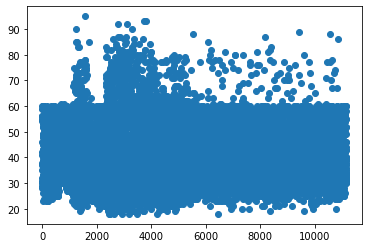

In [4]:
age = np.array(inputFile['age'])
plt.scatter(np.arange(age.size), age)

In [5]:
deposit = np.array(inputFile['deposit'])

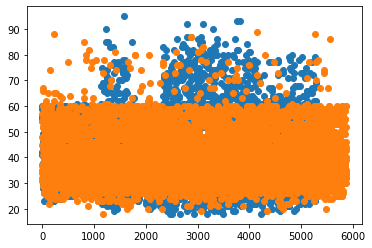

In [6]:
age1 = []
age2 = []
for i in range(deposit.size):
    if deposit[i] == 'yes':
        age1.append(age[i])
    else:
        age2.append(age[i])
        
plt.scatter(np.arange(len(age1)), age1)
plt.scatter(np.arange(len(age2)), age2)

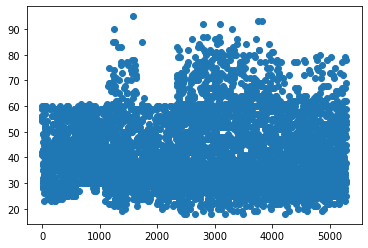

In [7]:
plt.scatter(np.arange(len(age1)), age1)

In [8]:
for i in range(age.size):
    if age[i] >60:
        age[i] = 0
    elif age[i]>40:
        age[i] = 1
    else:
        age[i] = 2

In [9]:
inputFile['age'] = age

In [10]:
balance = np.array(inputFile['balance'])

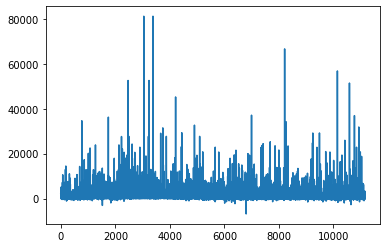

In [11]:
plt.plot(balance)

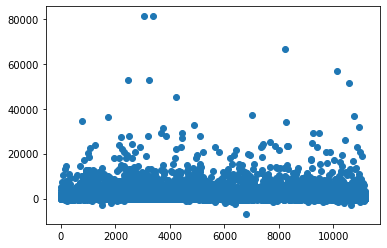

In [12]:
plt.scatter(np.arange(balance.size), balance)

In [13]:
day = np.array(inputFile['day'])
duration = np.array(inputFile['duration'])
campaign = np.array(inputFile['campaign'])
pdays = np.array(inputFile['pdays'])
previous = np.array(inputFile['previous'])

In [14]:
balance1 = []
balance2 = []
day1 = []
day2 = []
duration1, duration2, campaign1, campaign2, pdays1, pdays2, previous1, previous2 = [], [], [], [], [], [], [], []

Plot diagrams for each class ("yes" and "no" for deposit).

In [15]:
for i in range(deposit.size):
    if(deposit[i] == 'yes'):
        balance1.append(balance[i])
        day1.append(day[i])
        duration1.append(duration[i])
        campaign1.append(campaign[i])
        pdays1.append(pdays[i])
        previous1.append(previous[i])
    else:
        balance2.append(balance[i])
        day2.append(day[i])
        duration2.append(duration[i])
        campaign2.append(campaign[i])
        pdays2.append(pdays[i])
        previous2.append(previous[i])

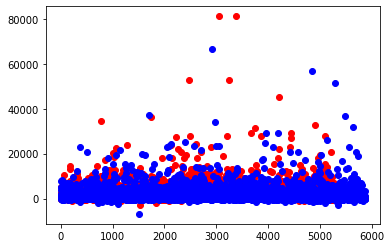

In [16]:
plt.scatter(np.arange(len(balance1)), balance1, color = 'r')
plt.scatter(np.arange(len(balance2)), balance2, color = 'b')

In [17]:
from scipy import stats

In [18]:
stats.mode(balance)[0]

array([0])

In [19]:
for i in range(balance.size):
    if balance[i] < 10000:
        balance[i] = 0
    elif balance[i] < 20000:
        balance[i] = 1
    else:
        balance[i] = 2

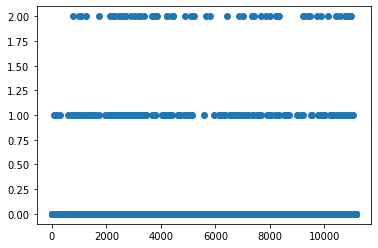

In [20]:
plt.scatter(np.arange(balance.size), balance)

In [21]:
inputFile['balance'] = balance

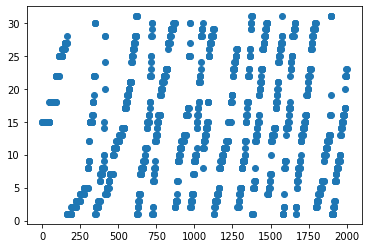

In [22]:
plt.scatter(list(range(2000)), day[2000:4000])

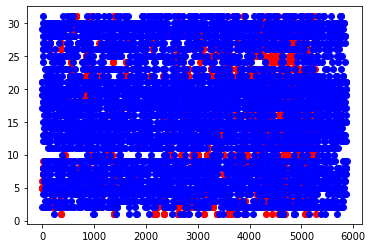

In [23]:
plt.scatter(list(range(len(day1))), day1, color = 'r')
plt.scatter(list(range(len(day2))), day2, color = 'b')

In [24]:
for i in range(day.size):
    if day[i] <= 10:
        day[i] = 0
    elif day[i] <= 20:
        day[i] = 1
    else:
        day[i] = 2

In [25]:
inputFile['day'] = day

In [26]:
duration

array([1042, 1467, 1389, ...,  156,    9,  628])

In [27]:
min(duration)

2

In [28]:
max(duration)

3881

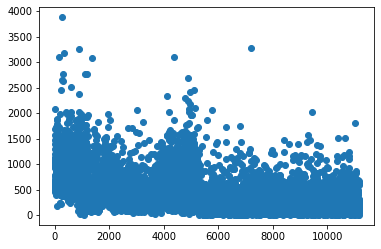

In [29]:
plt.scatter(list(range(duration.size)), duration)

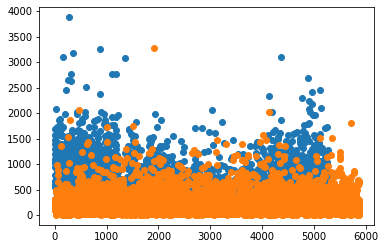

In [30]:
plt.scatter(list(range(len(duration1))), duration1)
plt.scatter(list(range(len(duration2))), duration2)

In [31]:
for i in range(duration.size):
    if duration[i] < 500:
        duration[i] = 0
    elif duration[i] <1500:
        duration[i] = 1
    else:
        duration[i] = 2

In [32]:
inputFile['duration'] = duration

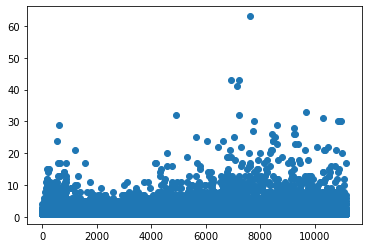

In [33]:
plt.scatter(list(range(campaign.size)), campaign)

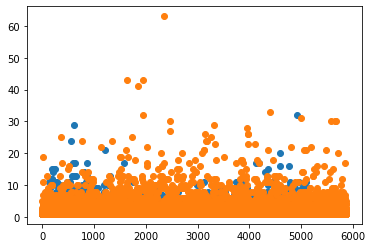

In [34]:
plt.scatter(list(range(len(campaign1))), campaign1)
plt.scatter(list(range(len(campaign2))), campaign2)

In [35]:
for i in range(campaign.size):
    if campaign[i] < 10:
        campaign[i] = 0
    else:
        campaign[i] = 1

In [36]:
inputFile['campaign'] = campaign

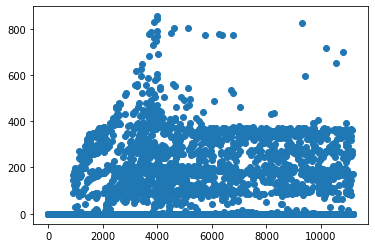

In [37]:
plt.scatter([range(pdays.size)], pdays)

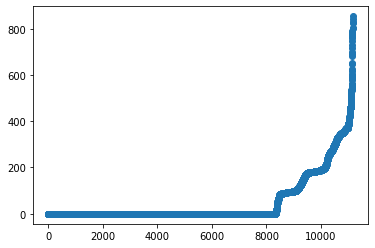

In [38]:
pdays_sort = np.sort(pdays)
plt.scatter([range(pdays_sort.size)], pdays_sort)

In [39]:
for i in range(pdays.size):
    if pdays[i]>0 and pdays[i]<400:
        pdays[i] = 1
    elif pdays[i] > 0:
        pdays[i] = 2

In [40]:
pdays

array([-1, -1, -1, ..., -1,  1, -1])

In [48]:
inputFile['pdays'] = pdays

In [49]:
previous_sort = np.sort(previous)

In [50]:
previous

array([0, 0, 0, ..., 0, 5, 0])

In [51]:
previous_sort

array([ 0,  0,  0, ..., 41, 55, 58])

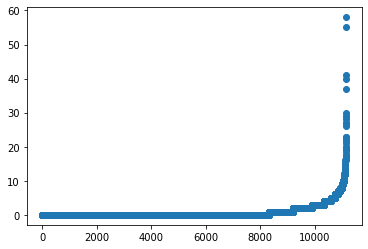

In [52]:
plt.scatter(list(range(previous.size)), previous_sort)

In [53]:
previous_sort[0]

0

In [55]:
for i in range(previous.size):
    if previous[i]> 0:
        if previous[i]<12:
            previous[i] = 1
        else:
            previous[i] =2

In [56]:
inputFile['previous'] = previous

# Save processed data to train.csv.

In [58]:
inputFile.to_csv('train.csv')